In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [7]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

total_epochs = 100
initial_lr = 1
end_lr = 1e-4
learning_rate_decay_type = 'exponential'

In [8]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, initial_lr=initial_lr, end_lr=end_lr)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [9]:
bnn.train_model(total_epochs, learning_rate_decay_type)

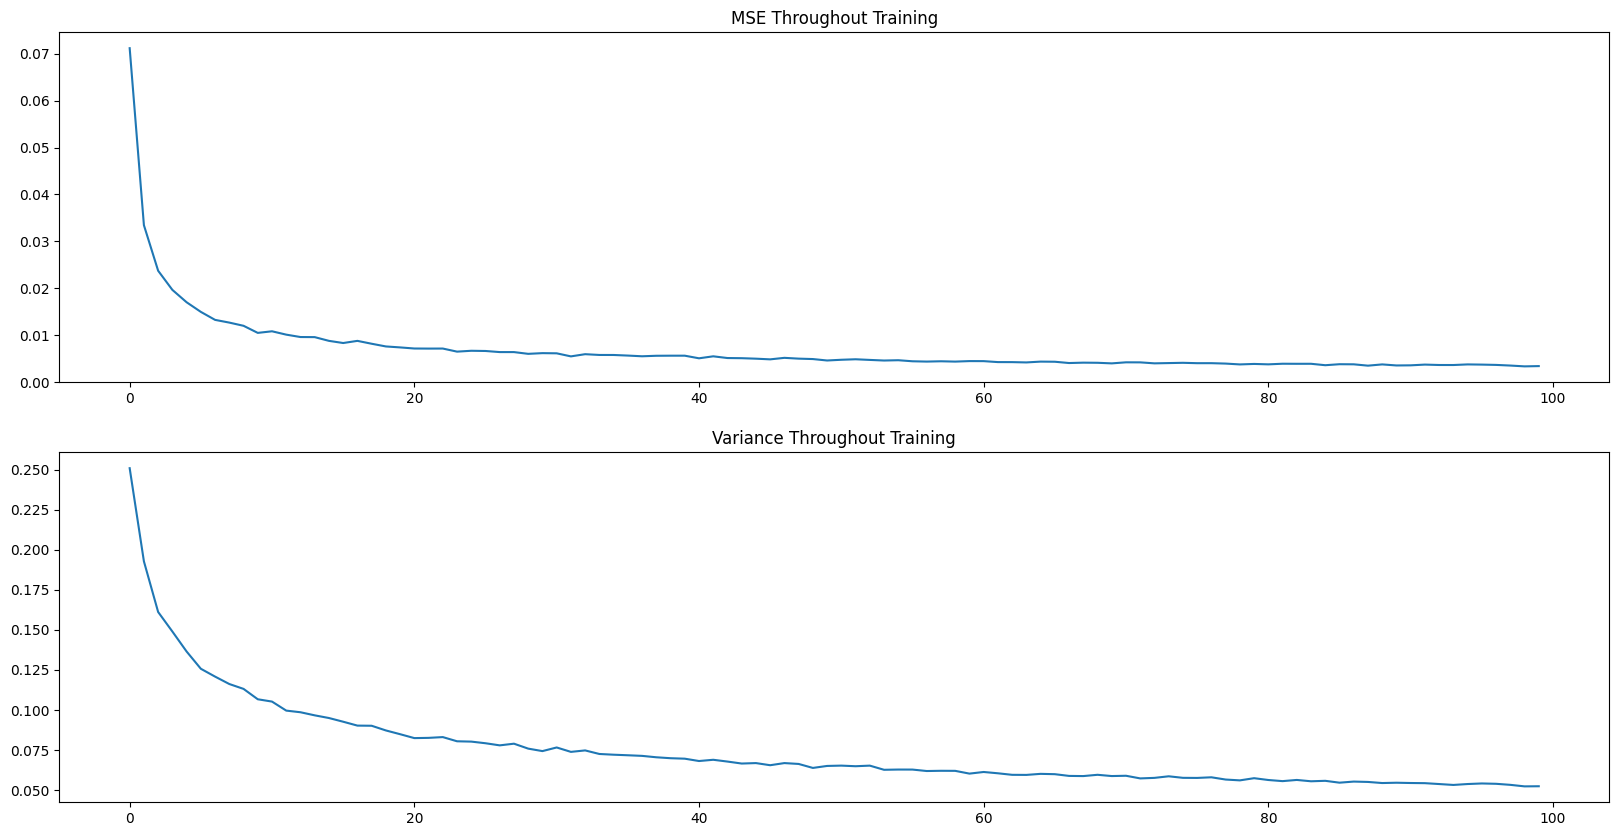

In [10]:
bnn.visualize_performance()

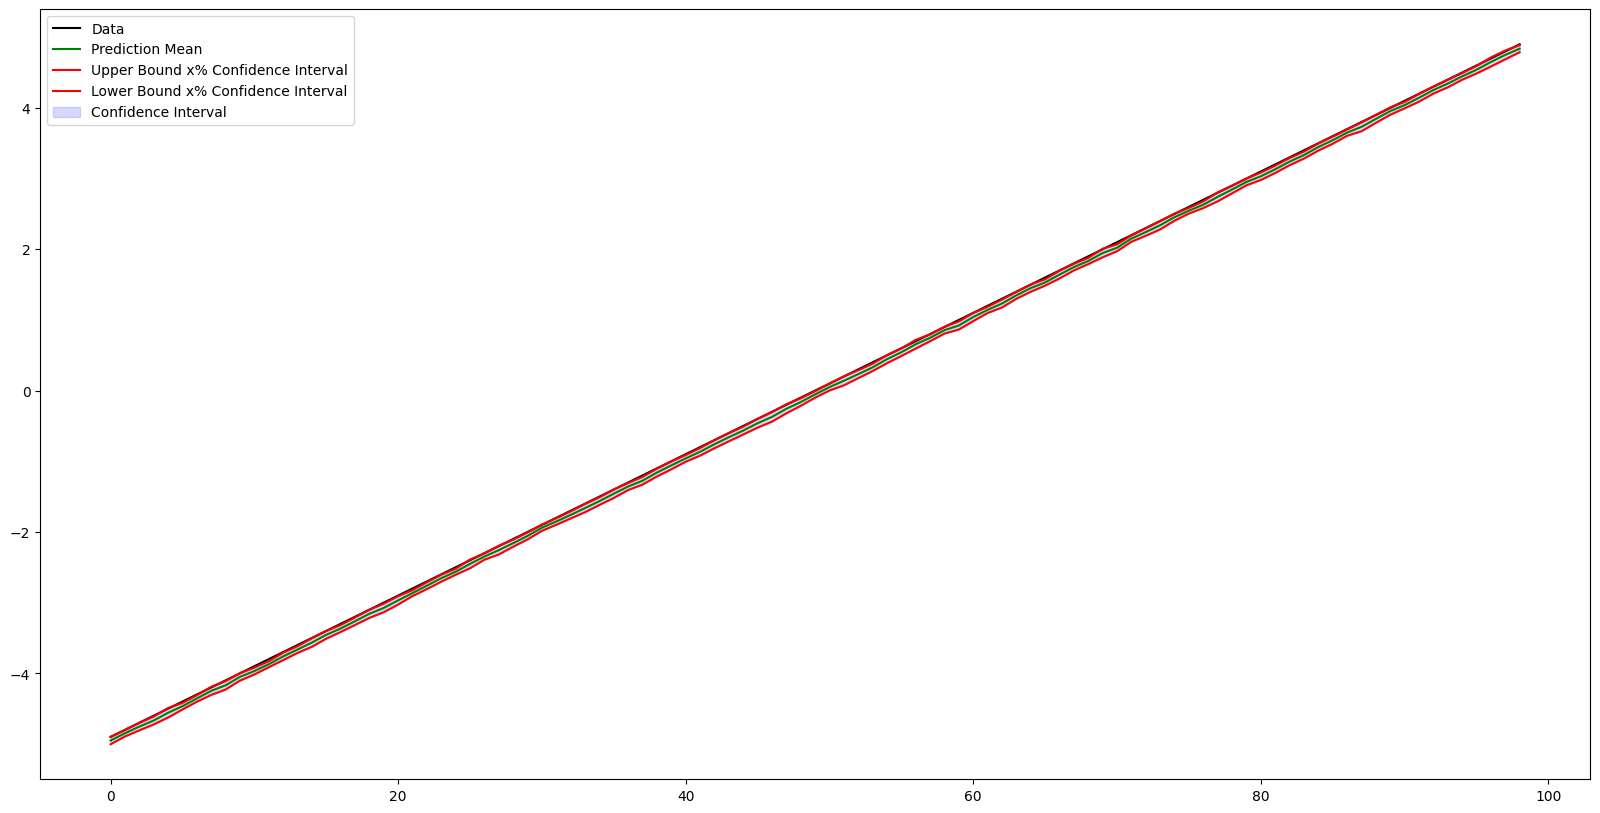

In [11]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [42]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

total_epochs = 250
initial_lr = 1e-1
end_lr = 1e-4
learning_rate_decay_type = 'exponential'

In [43]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, initial_lr=initial_lr, end_lr=end_lr)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [44]:
bnn.train_model(total_epochs, learning_rate_decay_type)

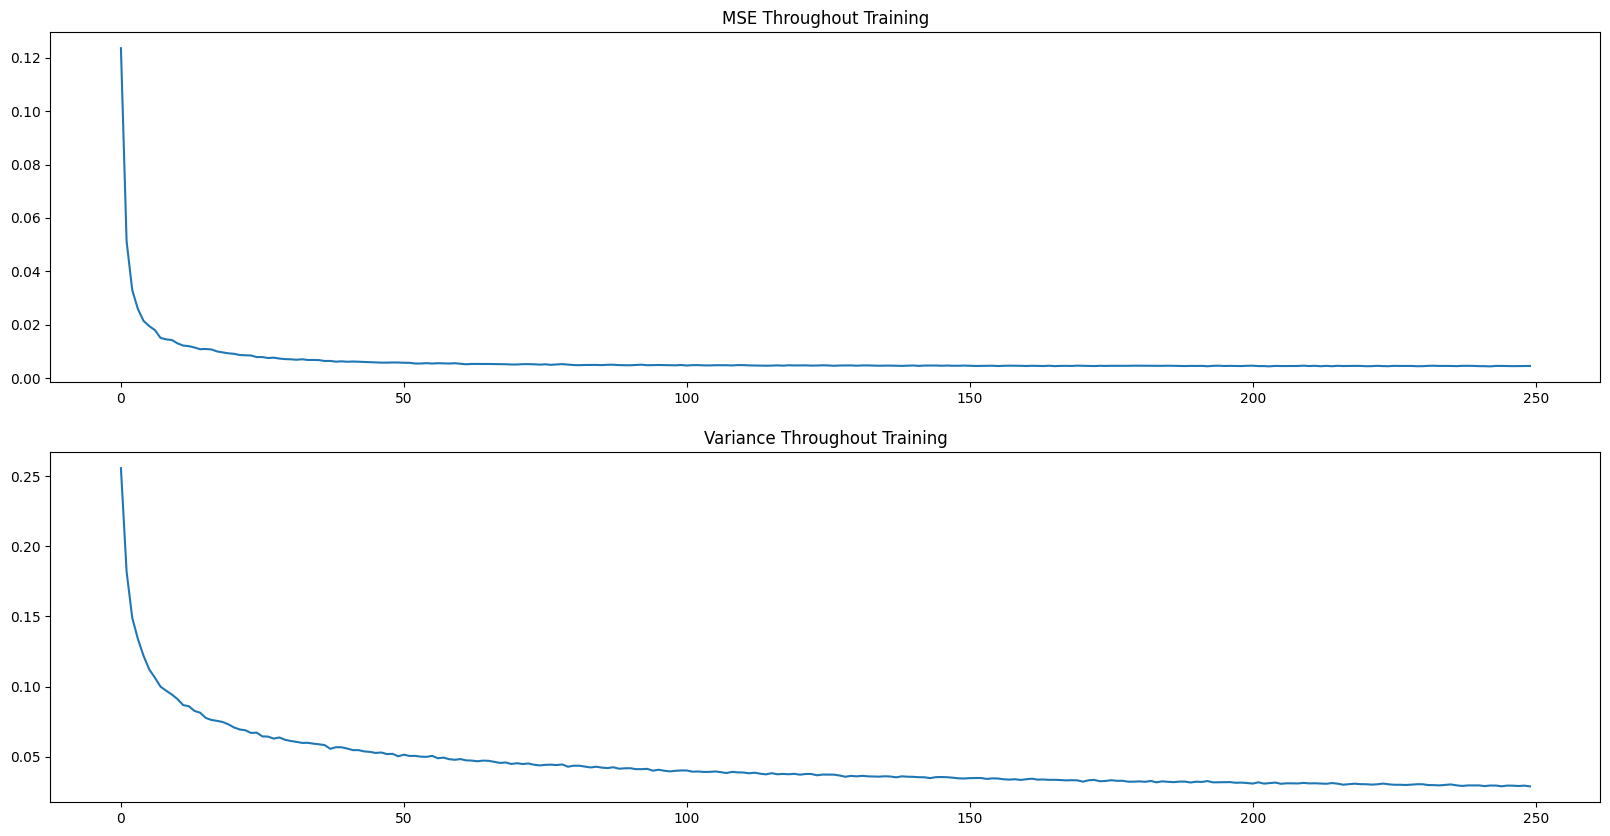

In [45]:
bnn.visualize_performance()

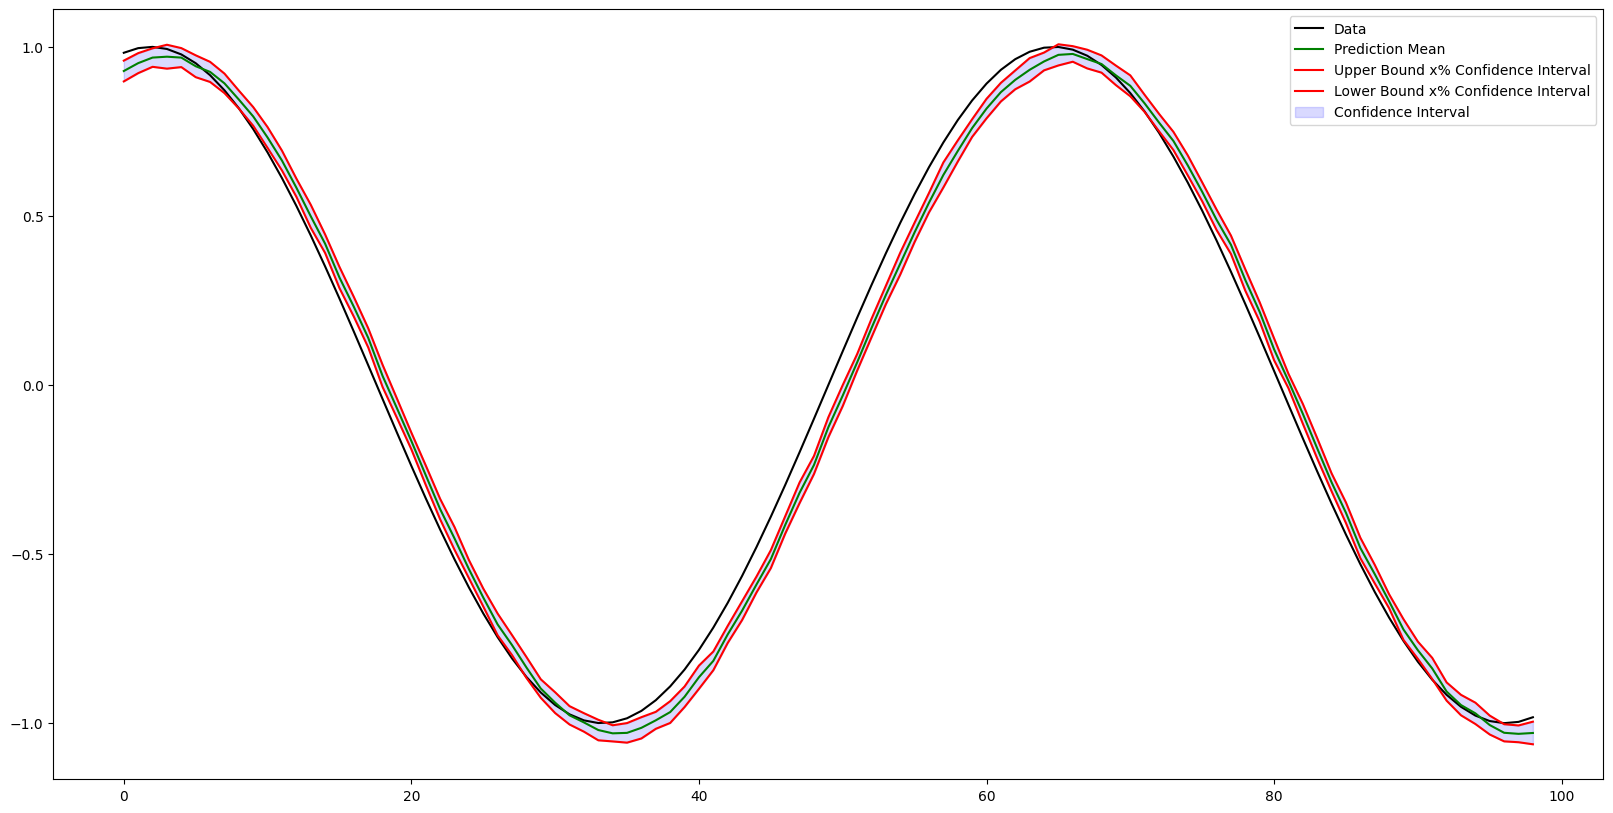

In [46]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

# Model Performance On Multiple Inputs

## On Linear Data

In [146]:
input_layer = [2]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

window_size = 2
initial_lr = 5e-7
end_lr = 5e-9

total_epochs = 100
learning_rate_decay_type = 'exponential'

In [147]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [148]:
bnn.train_model(total_epochs, learning_rate_decay_type)

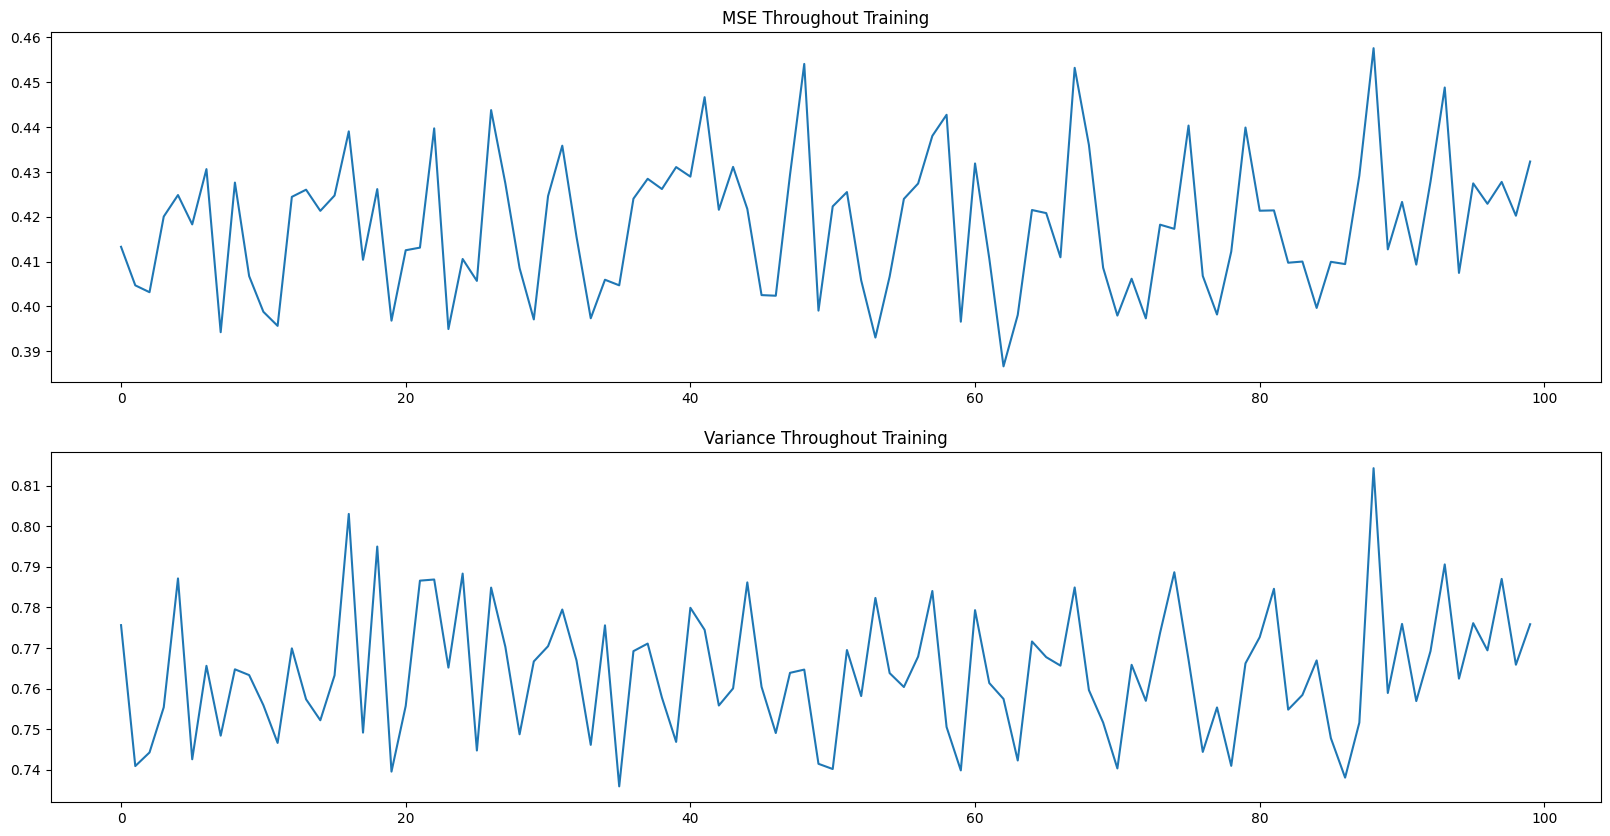

In [149]:
bnn.visualize_performance()

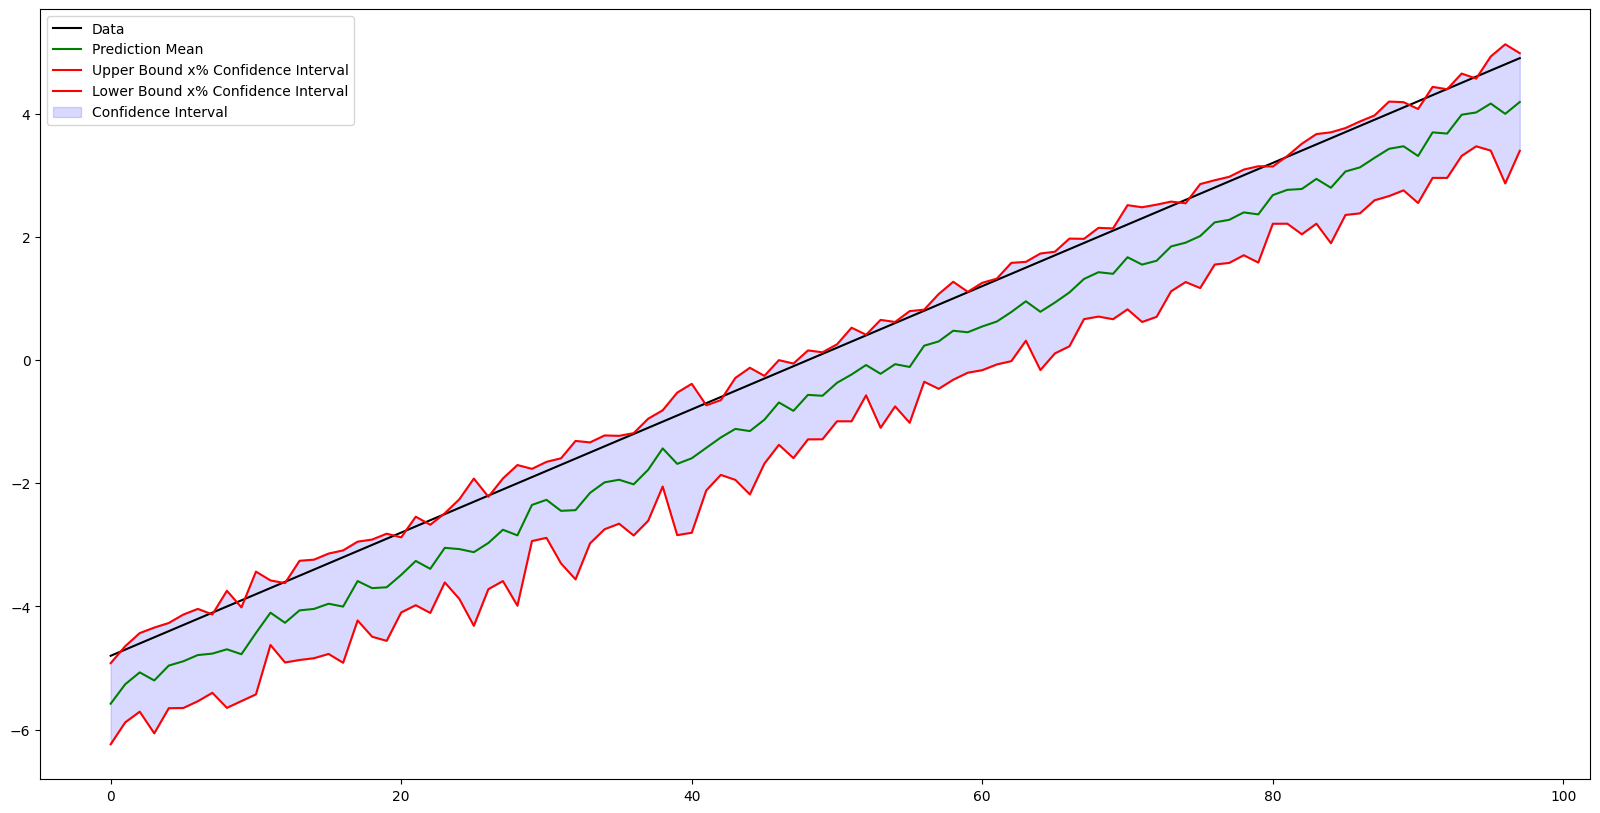

In [150]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [181]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

window_size = 3
initial_lr = 1e-10
end_lr = 1e-16

total_epochs = 250
learning_rate_decay_type = 'exponential'

In [182]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [183]:
bnn.train_model(total_epochs, learning_rate_decay_type)

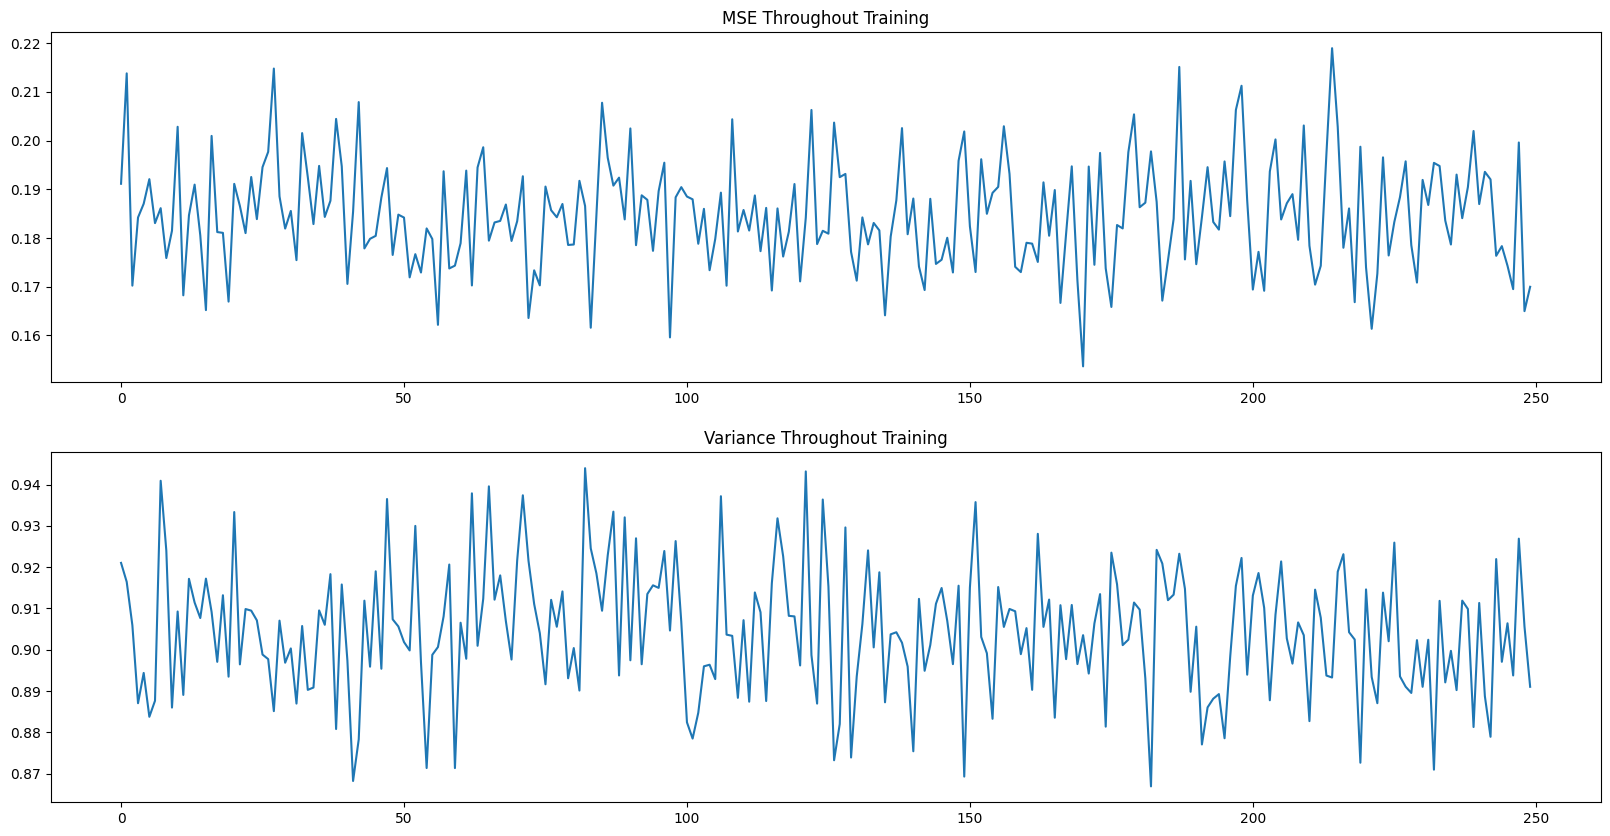

In [184]:
bnn.visualize_performance()

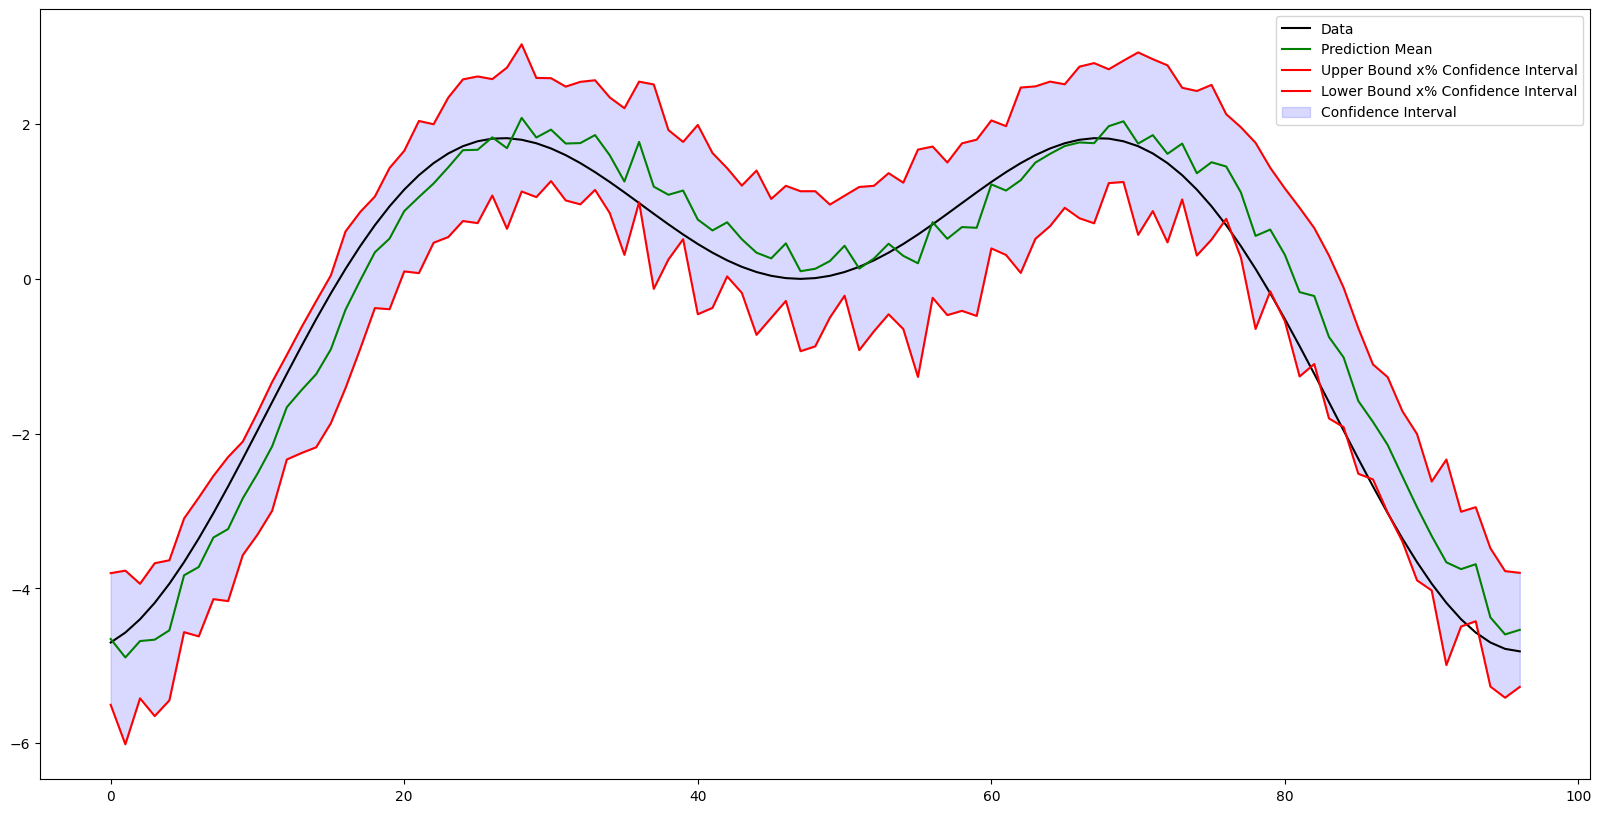

In [185]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

# Model Learning Rate Tuning

In [158]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

initial_lr = 10
end_lr = 20
total_iters = 50
tuning_epochs = 25
window_size = 3

In [159]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr, end_lr_power=end_lr, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [160]:
bnn_lr_tuning.learning_rate_tuning()

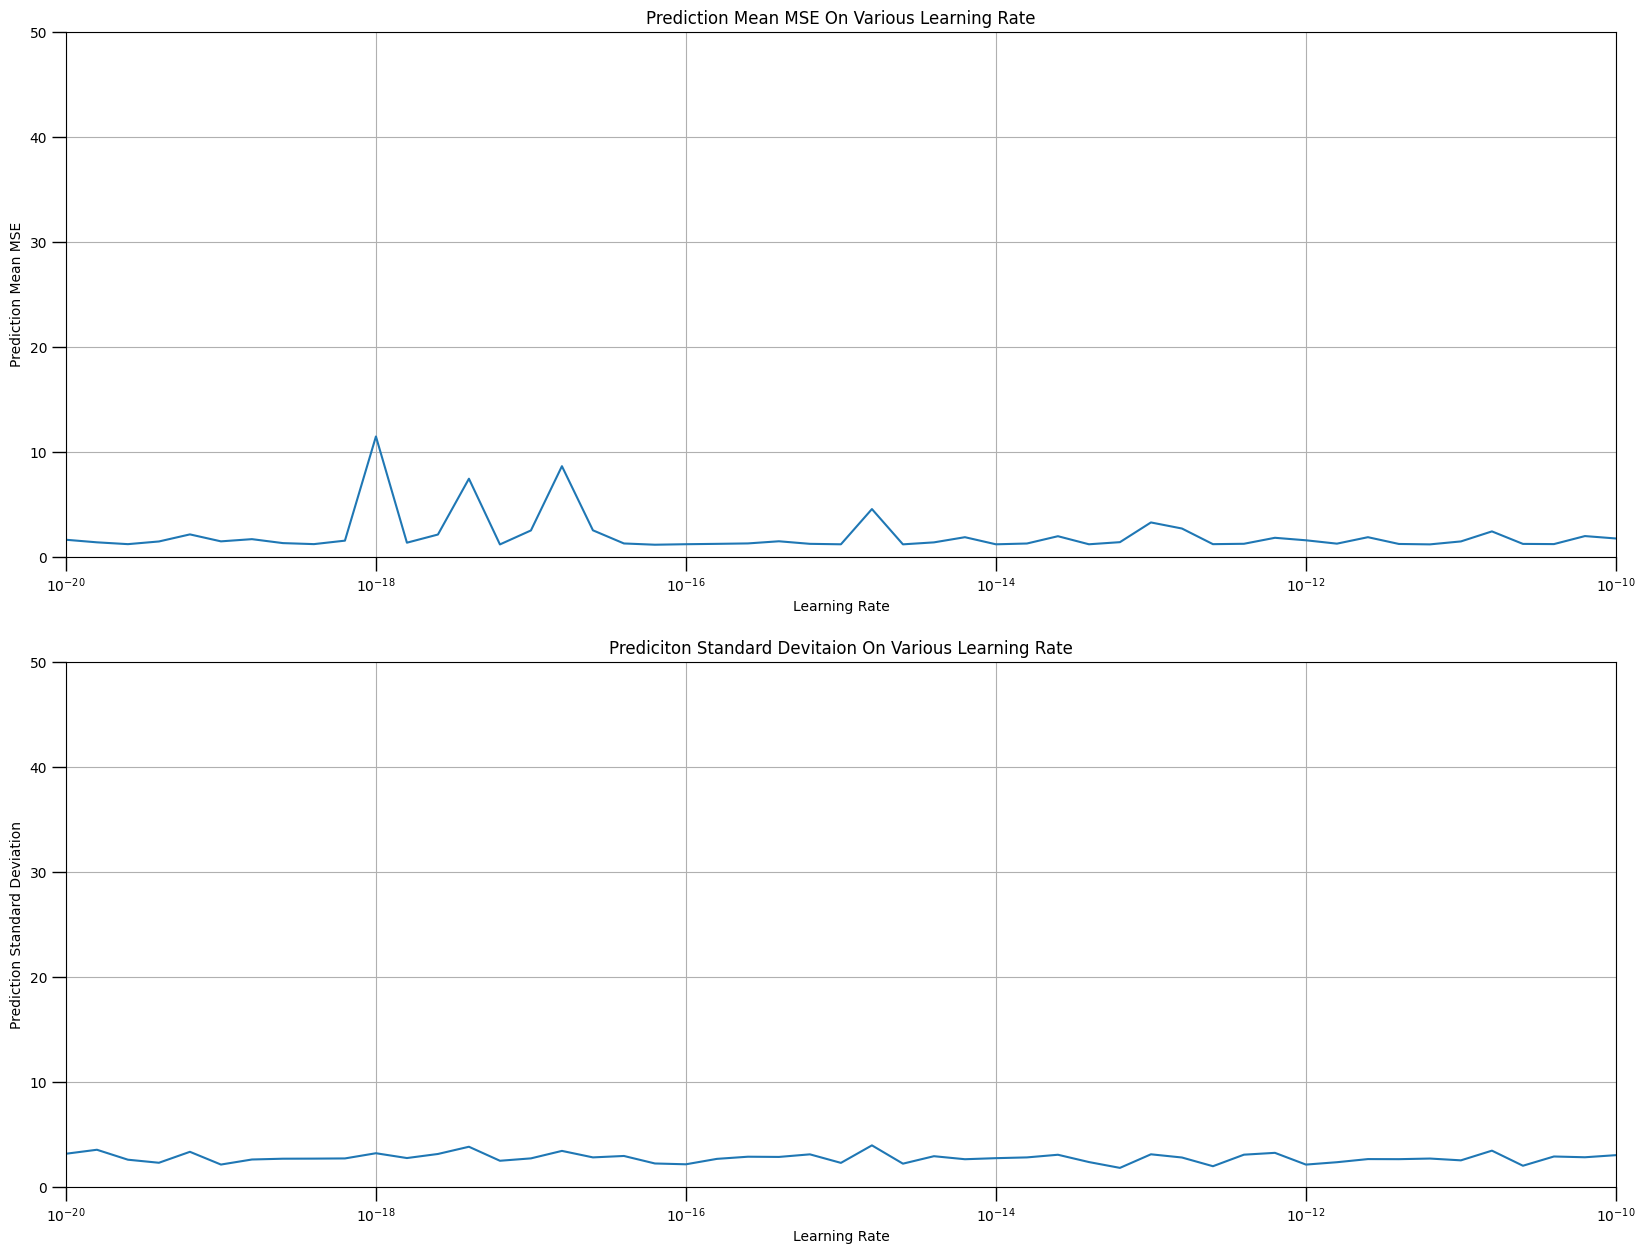

In [161]:
bnn_lr_tuning.visualize_learning_rate_tuning()

# Model Performance On Data With Outliers

## Data Preparation

In [198]:
x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

y_data[-5] *= 0.75
y_data[15] *= 2
y_data[40] *= 0.1
y_data[70] *= 0.5
y_data[-20] *= 2.5

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

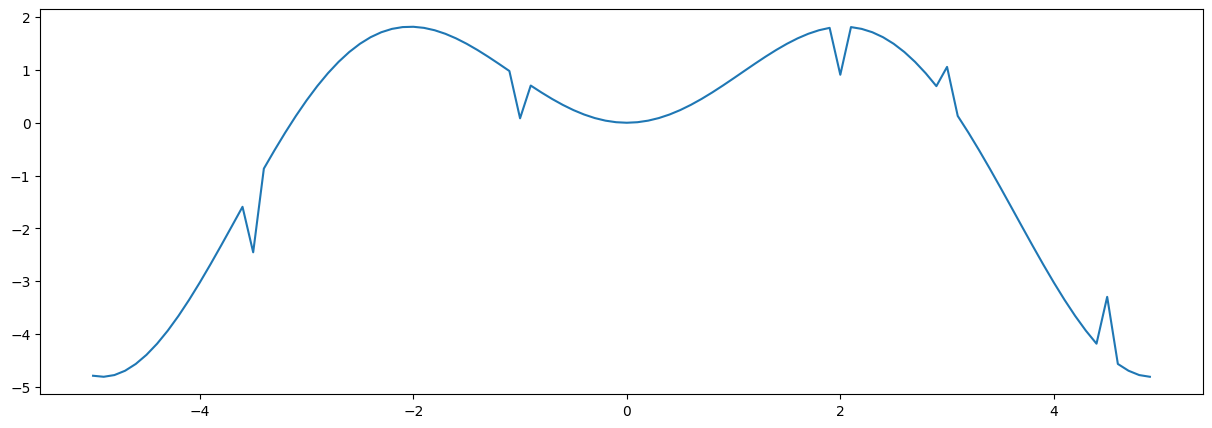

In [199]:
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.plot(x_data, y_data)

## Learning Rate Tuning

In [189]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

initial_lr_power = 1
end_lr_power = 20
total_iters = 100
tuning_epochs = 25
window_size = 3

In [190]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr_power, end_lr_power=end_lr_power, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [191]:
bnn_lr_tuning.learning_rate_tuning()

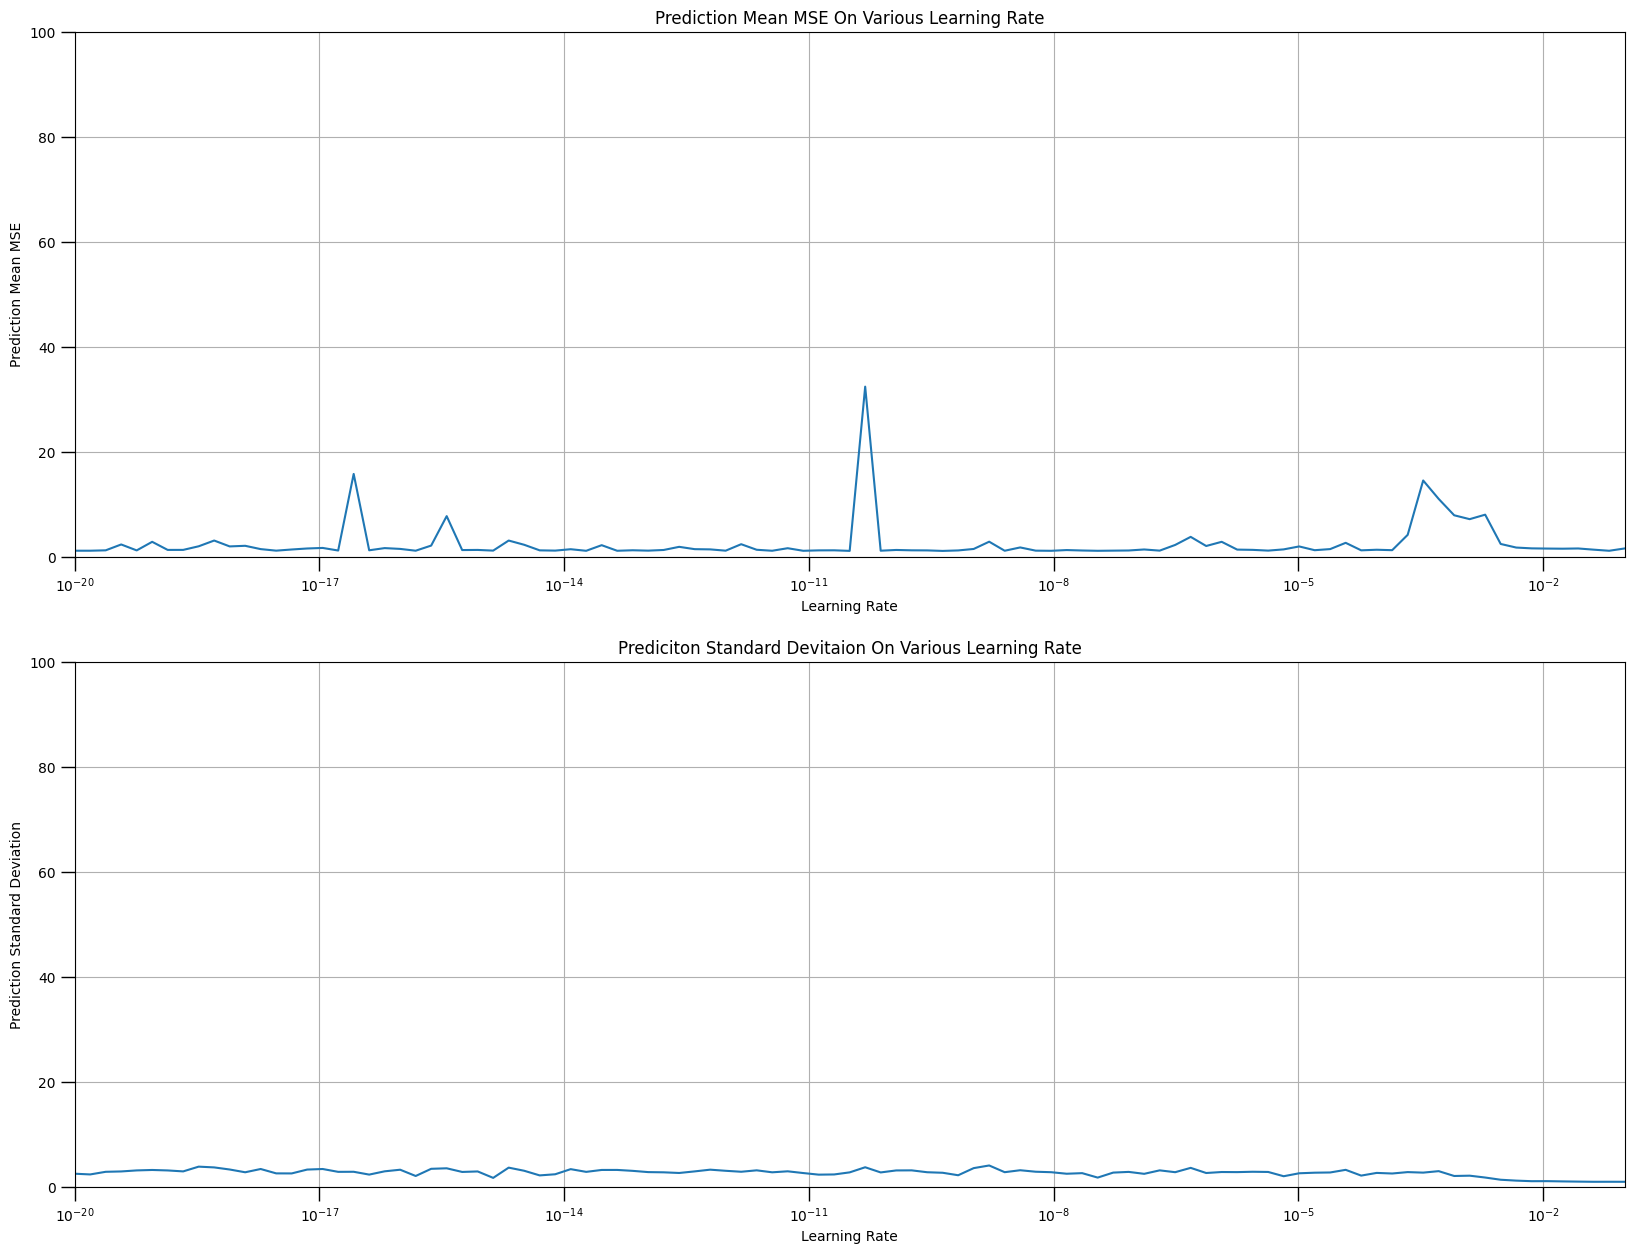

In [192]:
bnn_lr_tuning.visualize_learning_rate_tuning()

## Model Fitting and Performances

In [200]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

window_size = 3
initial_lr = 1e-5
end_lr = 1e-10

total_epochs = 100
learning_rate_decay_type = 'exponential'

In [201]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [202]:
bnn.train_model(total_epochs, learning_rate_decay_type)

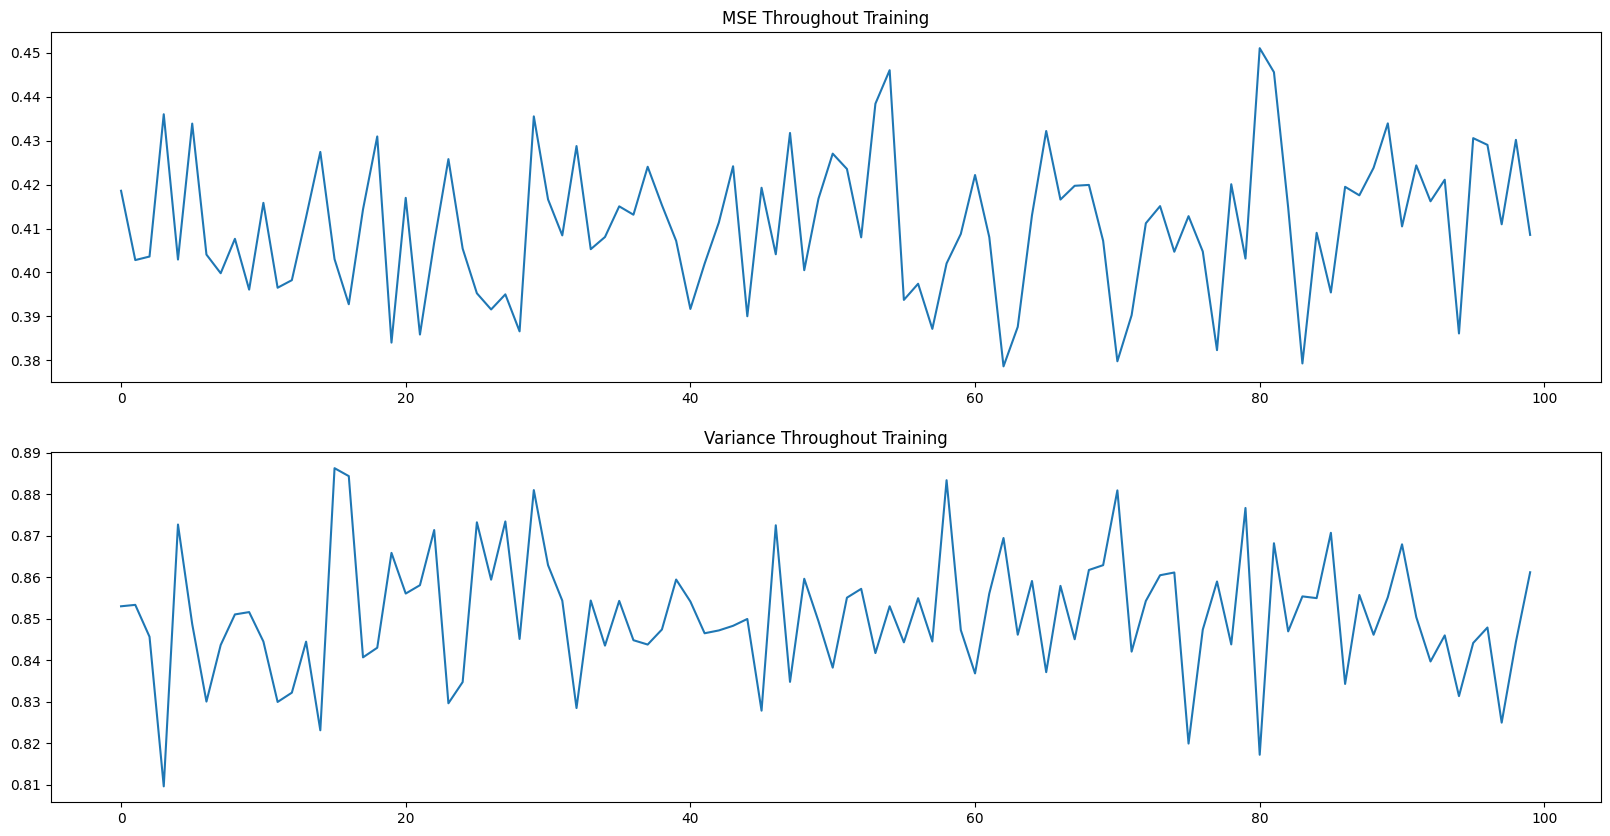

In [203]:
bnn.visualize_performance()

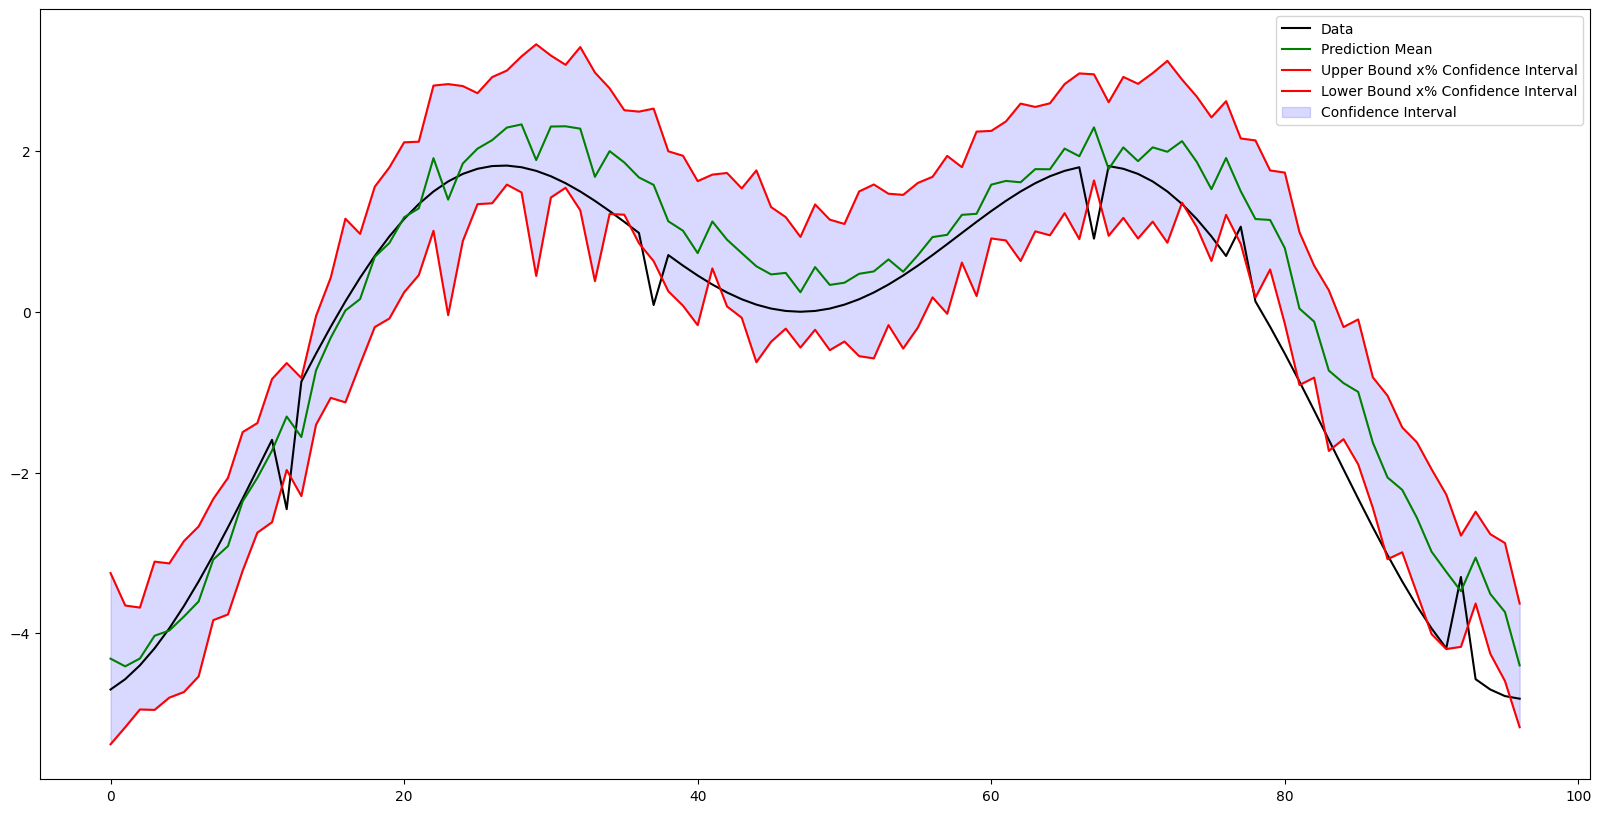

In [204]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()